<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<ipython-input-1-b7eb25899c53>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-b7eb25899c53>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

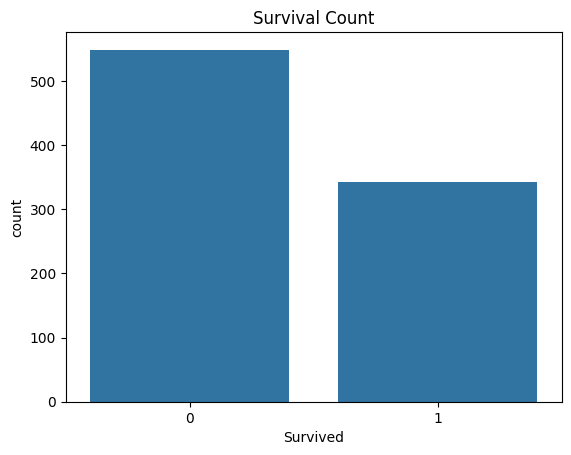

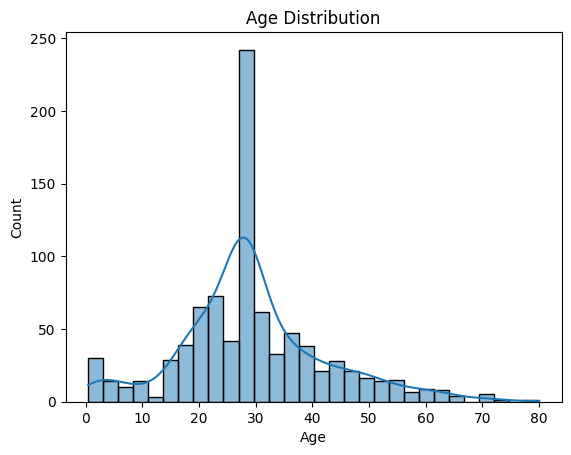

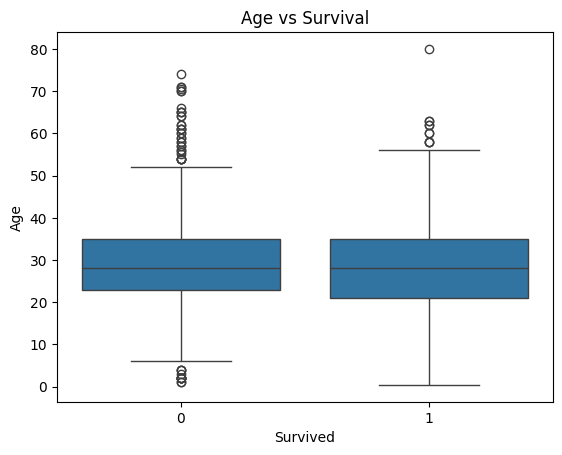

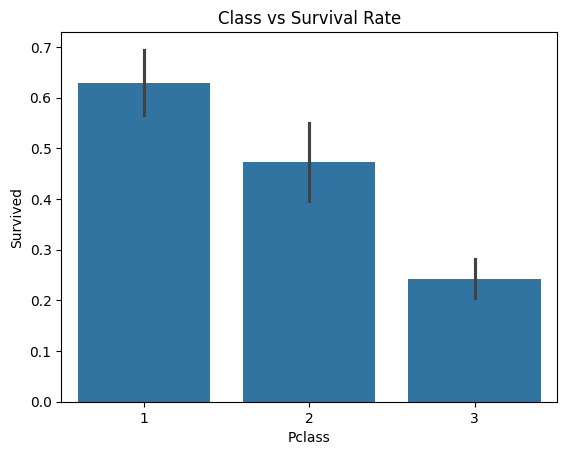

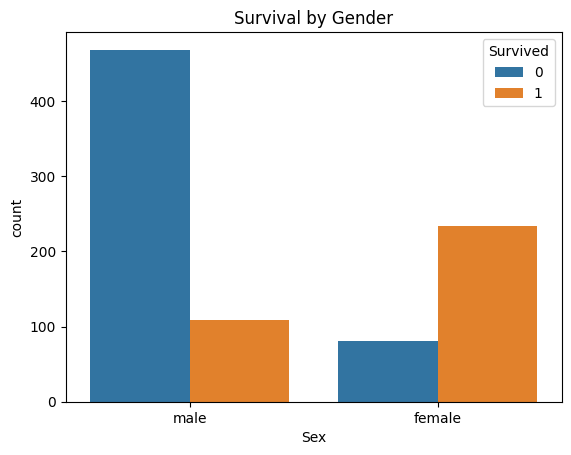

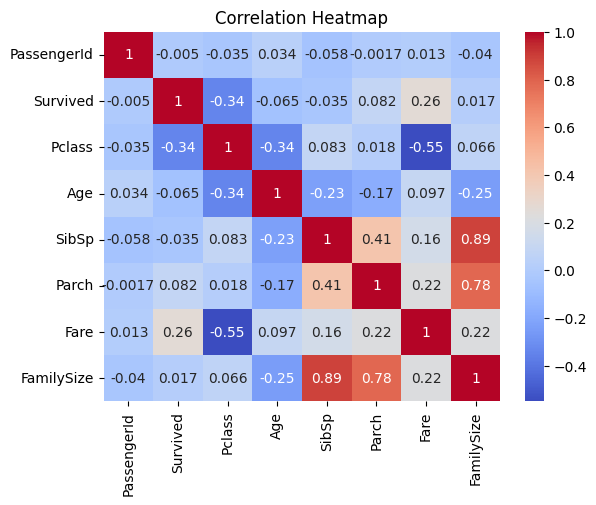

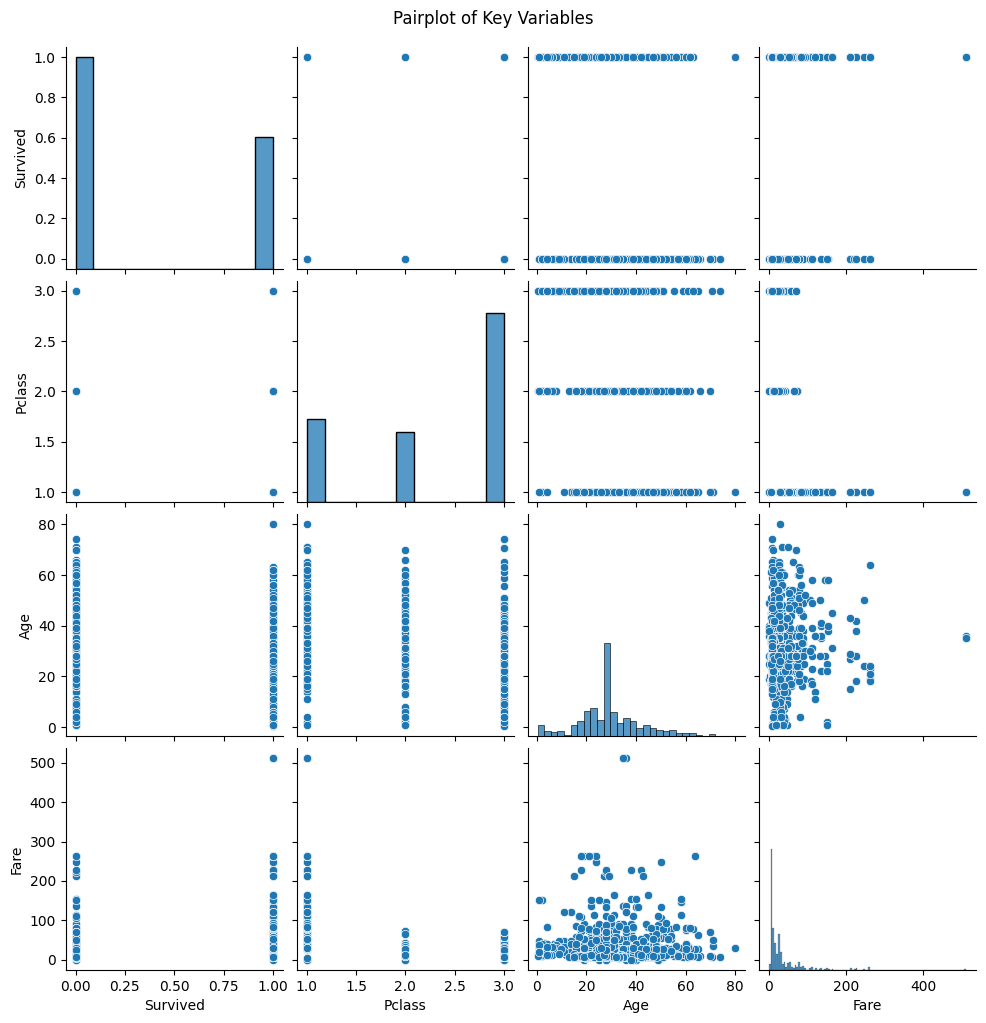

In [1]:
# Titanic EDA Assignment - Internship Task 5

# 📘 1. Introduction
# Titanic Dataset Analysis
# Goal: Explore patterns in survival based on class, gender, age, etc.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("train (1).csv")

# 📊 2. Data Overview
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 🔧 3. Data Cleaning
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# 👨‍👩‍👧 4. Feature Engineering
# FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Extract Title from Name
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# 📊 5. Univariate Analysis
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# 📈 6. Bivariate Analysis
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Class vs Survival Rate")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# 🔗 7. Multivariate Analysis
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']])
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

# 📋 8. Summary of Insights
# 1. Women had a much higher survival rate.
# 2. First-class passengers had better chances of survival.
# 3. Younger passengers were more likely to survive.
# 4. Family size had an impact on survival (too large/small groups affected).
# 5. Titles like 'Mrs', 'Miss' had higher survival due to gender and age.

# 📘 9. Conclusion
# This analysis highlighted that gender, class, and age strongly influenced survival.
# Insights can guide disaster planning and prioritization in emergencies.

# End of Notebook
